In [18]:
import numpy as np
import torch

In [ ]:
array = np.load('data/slice_1.npy')

In [ ]:
tensor = torch.tensor(array)


In [ ]:
print(array)

In [ ]:
print("Converted PyTorch tensor:")
print(tensor)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
array_back = tensor.numpy()

# Plot the array
plt.plot(array_back)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of tensor')
plt.show()

In [19]:
import os
import numpy as np
import scipy.io

mat_directory = 'matdata/'
numpy_directory = 'numpydata/'

if not os.path.exists(numpy_directory):
    os.makedirs(numpy_directory)

slice_size = 81920
for filename in os.listdir(mat_directory):
    if filename.endswith('.mat'):
        data = scipy.io.loadmat(os.path.join(mat_directory, filename))
        original_array = data['IQ_samples'].flatten()
        numpy_array = np.concatenate([original_array[i:i+slice_size] for i in range(0, len(original_array), slice_size)])
        npy_filename = f'{os.path.splitext(filename)[0]}_combined-L.npy'
        npy_file_path = os.path.join(numpy_directory, npy_filename)
        np.save(npy_file_path, numpy_array)
        print(f"Saved {npy_filename} in {numpy_directory}")


Saved lorasf7_g0.0dB_att12dB_freq867.4MHz_3_combined-L.npy in numpydata/
Saved lorasf7_g0.0dB_att12dB_freq867.4MHz_2_combined-L.npy in numpydata/
Saved lorasf7_g0.0dB_att12dB_freq867.4MHz_0_combined-L.npy in numpydata/
Saved lorasf7_g0.0dB_att12dB_freq867.4MHz_1_combined-L.npy in numpydata/
Saved lorasf7_g0.0dB_att12dB_freq867.4MHz_4_combined-L.npy in numpydata/
Saved lorasf12_g0.0dB_att24dB_freq867.4MHz_2_combined-L.npy in numpydata/
Saved lorasf12_g0.0dB_att24dB_freq867.4MHz_3_combined-L.npy in numpydata/
Saved lorasf12_g0.0dB_att24dB_freq867.4MHz_1_combined-L.npy in numpydata/
Saved lorasf12_g0.0dB_att24dB_freq867.4MHz_0_combined-L.npy in numpydata/
Saved lorasf12_g0.0dB_att24dB_freq867.4MHz_4_combined-L.npy in numpydata/


In [20]:
import matplotlib.pyplot as plt


(0.6862745098039216+0.6000000000000001j)
(-0.8980392156862745+0.12941176470588234j)


/Users/manoj/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


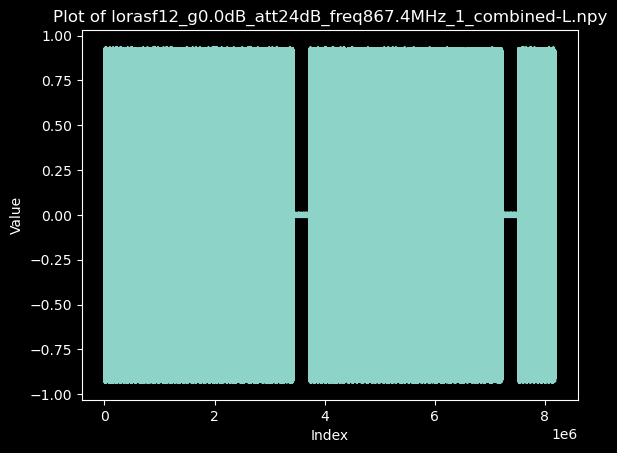

(-0.0039215686274509665-0.0039215686274509665j)
(0.0039215686274509665-0.0039215686274509665j)


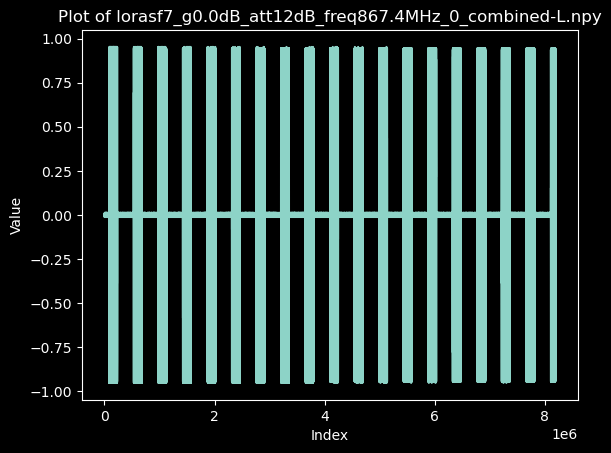

(0.7019607843137254-0.607843137254902j)
(0.019607843137254832+0.9215686274509804j)


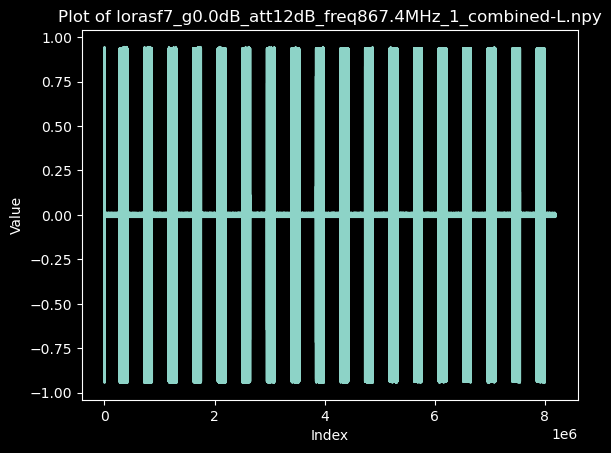

(0.0039215686274509665-0.0039215686274509665j)
(-0.0039215686274509665-0.0039215686274509665j)


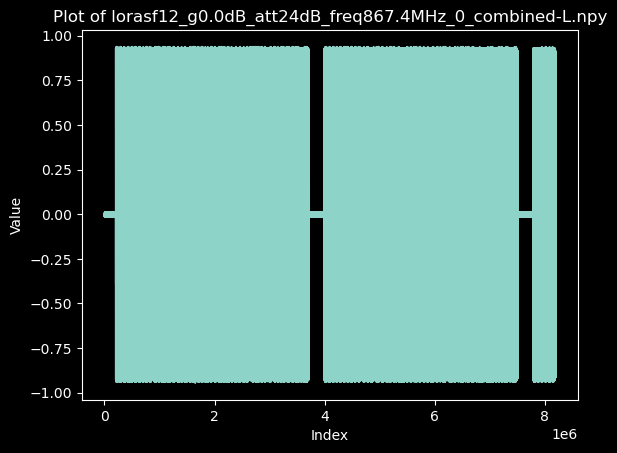

(-0.0039215686274509665+0.0039215686274509665j)
(-0.0039215686274509665-0.0039215686274509665j)


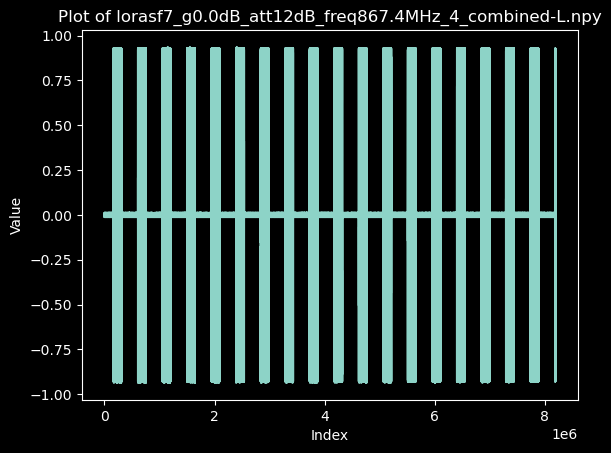

(-0.615686274509804-0.6705882352941177j)
(0.9058823529411764-0.027450980392156876j)


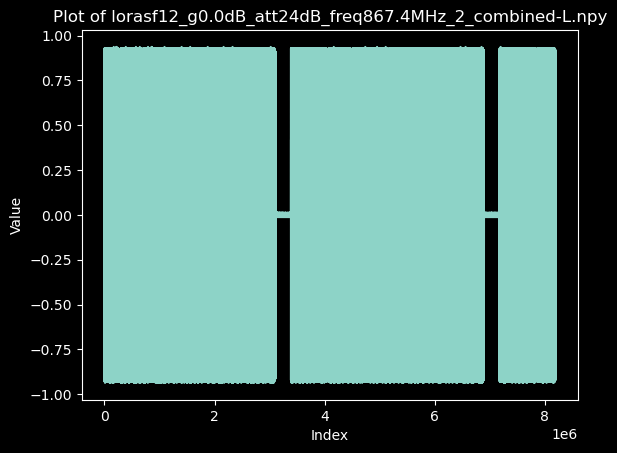

(-0.0039215686274509665-0.0039215686274509665j)
(0.0039215686274509665-0.0039215686274509665j)


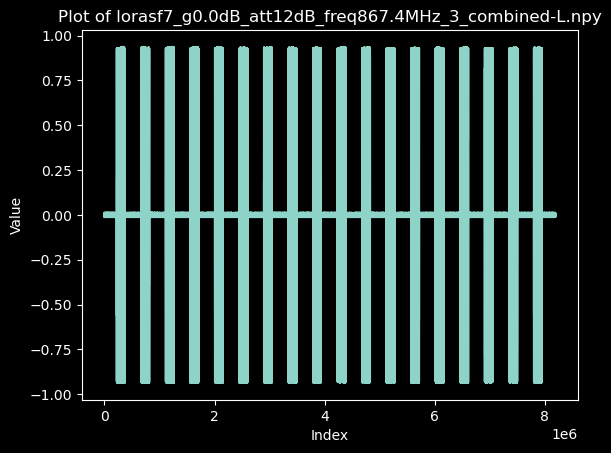

(-0.0039215686274509665-0.0039215686274509665j)
(-0.0039215686274509665+0.0039215686274509665j)


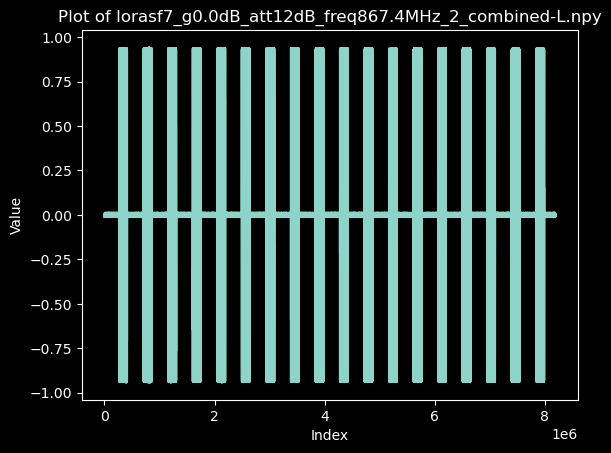

(-0.21568627450980393-0.8901960784313725j)
(0.8274509803921568+0.37254901960784315j)


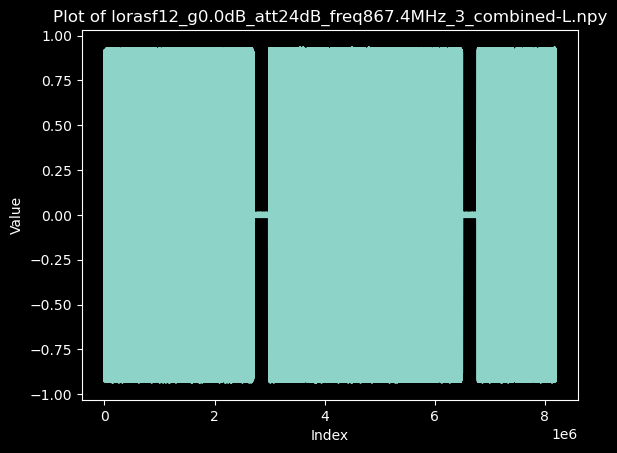

(-0.8196078431372549-0.4274509803921569j)
(0.7882352941176469-0.4901960784313726j)


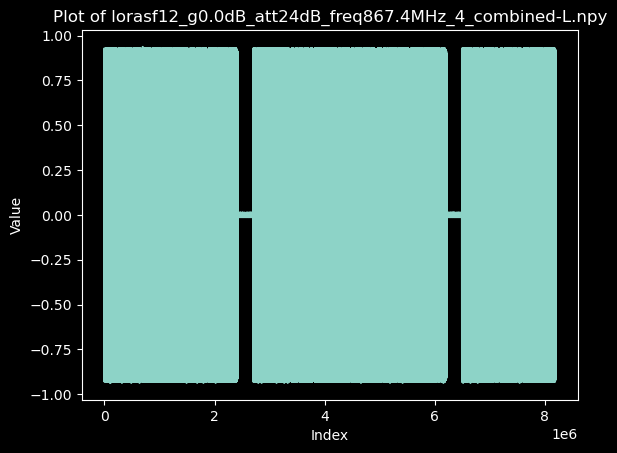

In [21]:
numpy_directory = 'numpydata/'
npy_files = [file for file in os.listdir(numpy_directory) if file.endswith('.npy')]
for npy_file in npy_files:
    file_path = os.path.join(numpy_directory, npy_file)
    numpy_array = np.load(file_path)
    print(numpy_array[0])
    print(numpy_array[1])
    # Plot the numpy array
    plt.plot(numpy_array)
    plt.title(f'Plot of {npy_file}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

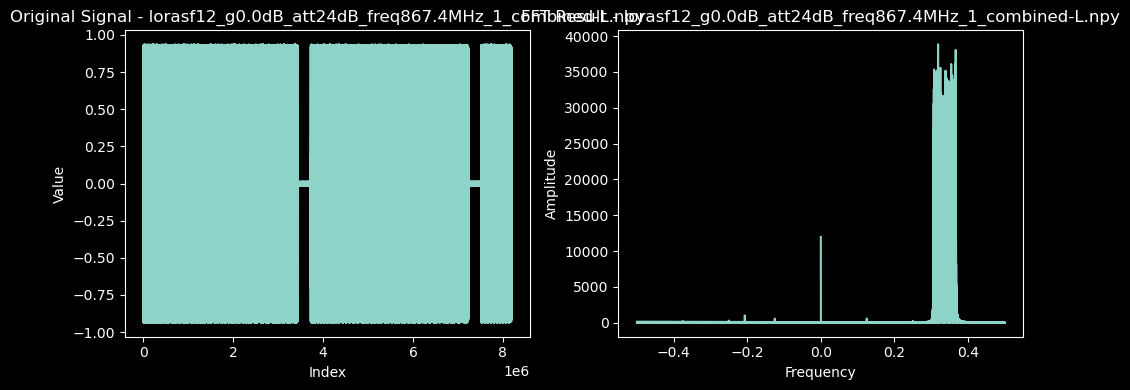

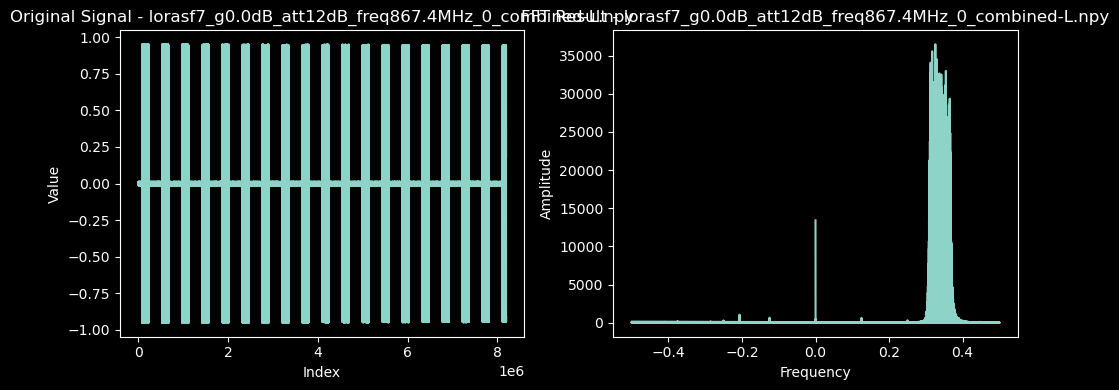

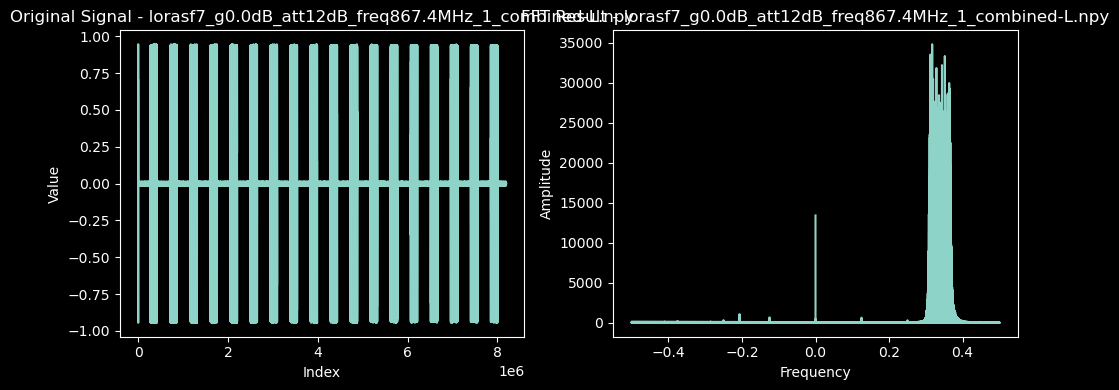

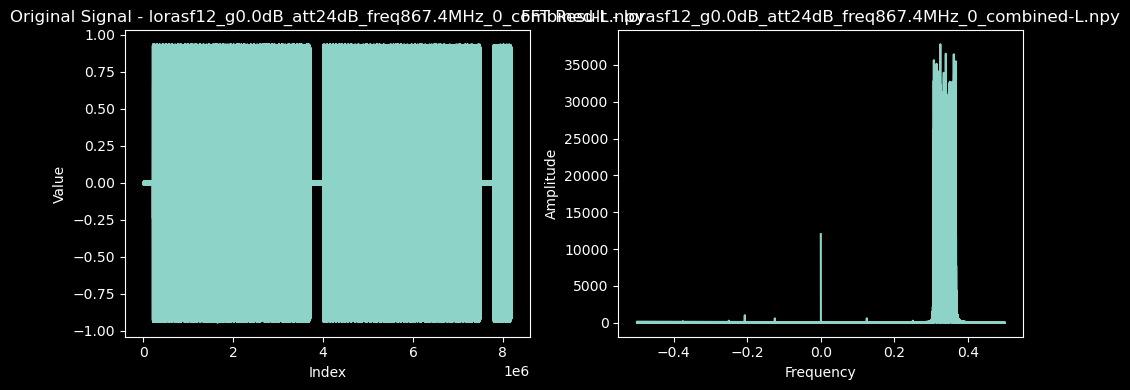

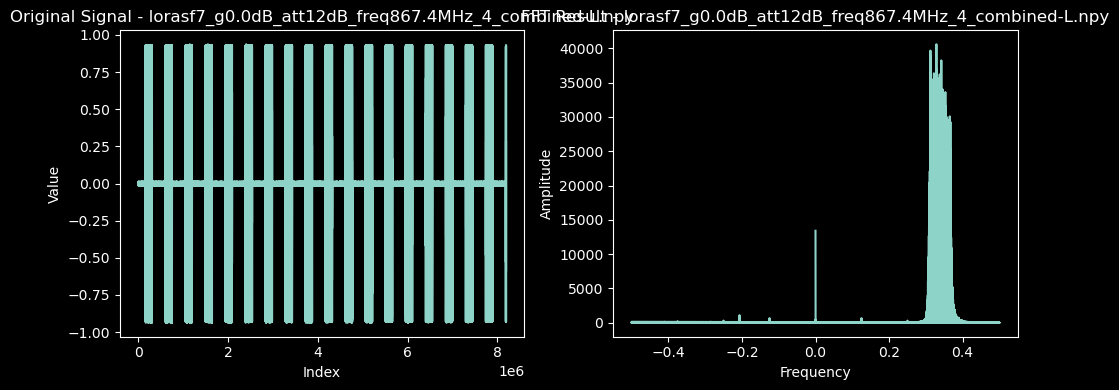

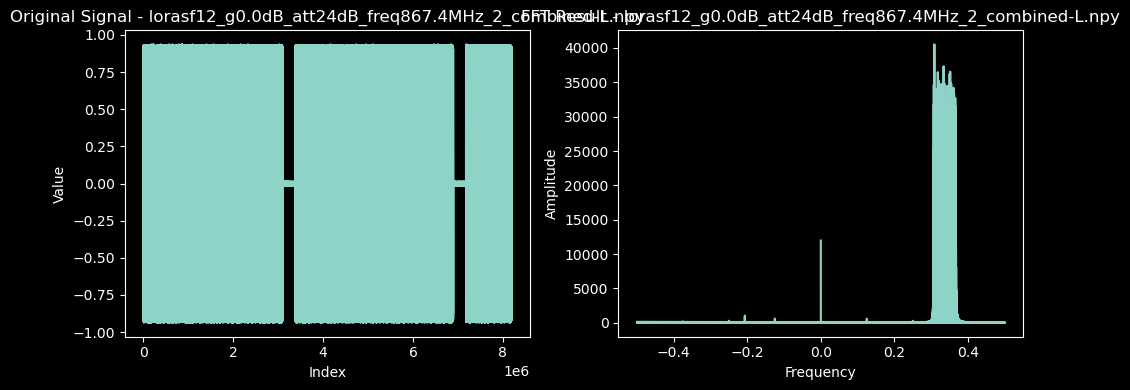

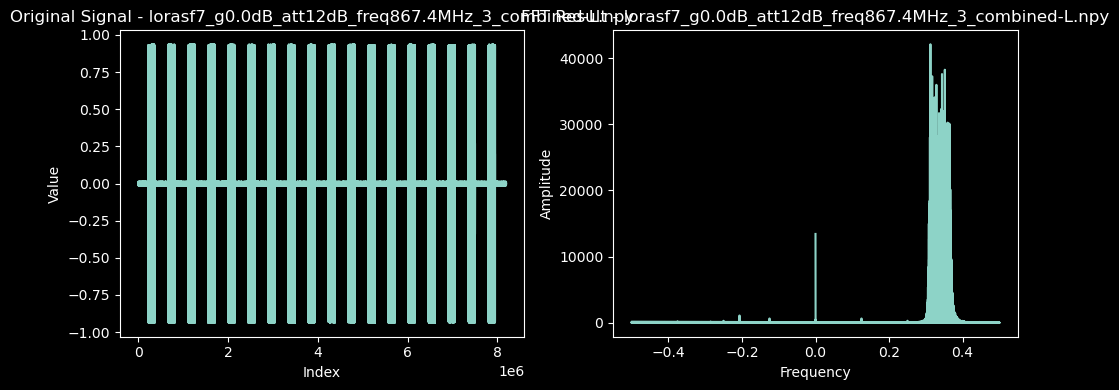

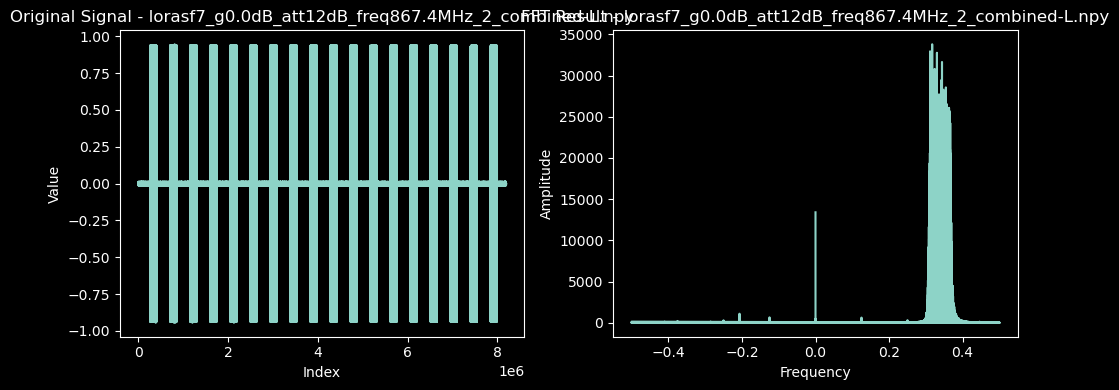

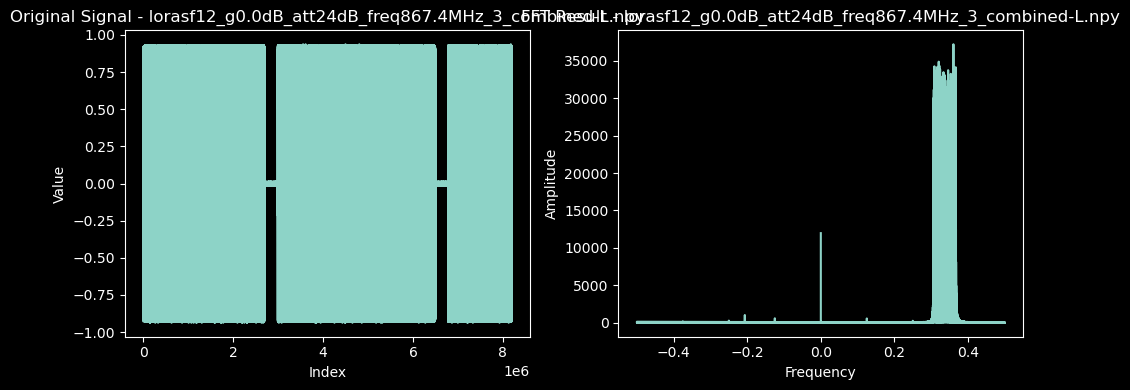

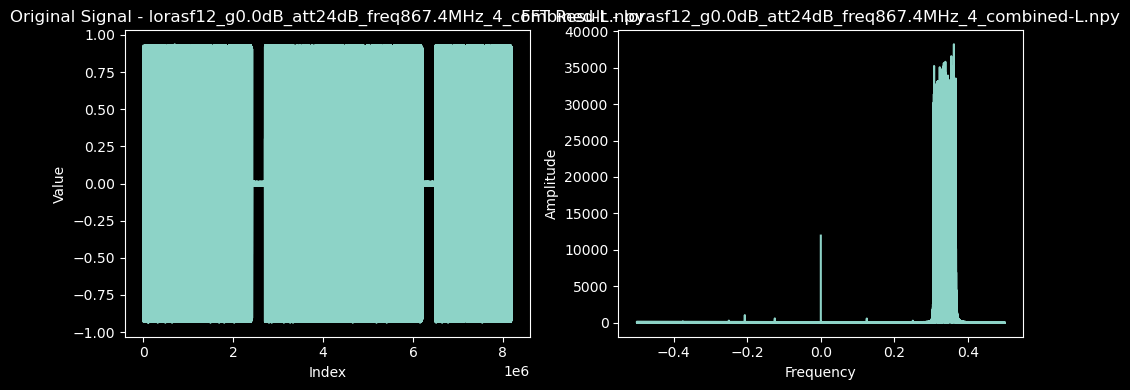

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt

numpy_directory = 'numpydata/'

# Get a list of all .npy files in the numpydata directory
npy_files = [file for file in os.listdir(numpy_directory) if file.endswith('.npy')]

# Iterate over each .npy file and plot its content before and after FFT
for npy_file in npy_files:
    file_path = os.path.join(numpy_directory, npy_file)
    numpy_array = np.load(file_path)
    
    # Plot the numpy array before FFT
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(numpy_array)
    plt.title(f'Original Signal - {npy_file}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    
    # Apply FFT
    fft_result = np.fft.fft(numpy_array)
    fft_freq = np.fft.fftfreq(len(numpy_array))
    
    # Plot the FFT result
    plt.subplot(1, 2, 2)
    plt.plot(fft_freq, np.abs(fft_result))
    plt.title(f'FFT Result - {npy_file}')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()
